In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:

path = '/home/james/Documents/DS3000/DS_Project/t_data.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Sno,X,State,conversation_id,...,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment,cluster
0,0,0,0,0,0,0,1,1,Assam,S1438213588544409600,...,0.0,0.0,3.23,0.0,0.00,0.0,1,-2,1,53
1,1,1,1,1,1,1,2,2,Assam,S1438437895270846464,...,0.0,0.0,0.00,0.0,0.00,0.0,1,-1,0,53
2,2,2,2,2,2,2,3,3,Assam,S1439558164936941574,...,0.0,0.0,0.00,0.0,0.00,0.0,1,-2,1,47
3,3,3,3,3,3,3,4,4,Assam,S1439920409801945089,...,0.0,0.0,0.00,0.0,2.08,0.0,1,-1,0,64
4,4,4,4,4,4,4,5,5,Assam,S1440221445011898371,...,0.0,0.0,5.71,0.0,0.00,0.0,1,-1,0,6


In [ ]:

# Preprocessing function
def preprocess_data(df, features, target_column, ignore_zero_targets=False):
    if ignore_zero_targets:
        df = df[df[target_column] != 0]
    
    df = df[features + [target_column]].copy()

    # Extract date and time features
    df['Date1'] = pd.to_datetime(df['Date1'], errors='coerce')
    df['Year'] = df['Date1'].dt.year
    df['Month'] = df['Date1'].dt.month
    df['DayOfWeek'] = df['Date1'].dt.dayofweek
    df['DayOfMonth'] = df['Date1'].dt.day
    df['ParsedTime'] = pd.to_datetime(df['Time'], errors='coerce')
    df['Hour'] = df['ParsedTime'].dt.hour.fillna(0)
    df['Minute'] = df['ParsedTime'].dt.minute.fillna(0)

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != target_column]
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    target = df[target_column]
    df = df.drop(columns=[target_column])
    df_preprocessed = preprocessor.fit_transform(df)

    processed_columns = (
        numeric_cols + 
        list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))
    )
    df_preprocessed = pd.DataFrame(df_preprocessed, columns=processed_columns)
    return df_preprocessed, target

Preprocessing data...

Performing PCA Analysis and Feature Selection...


/tmp/ipykernel_381737/2209751026.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ParsedTime'] = pd.to_datetime(df['Time'], errors='coerce')


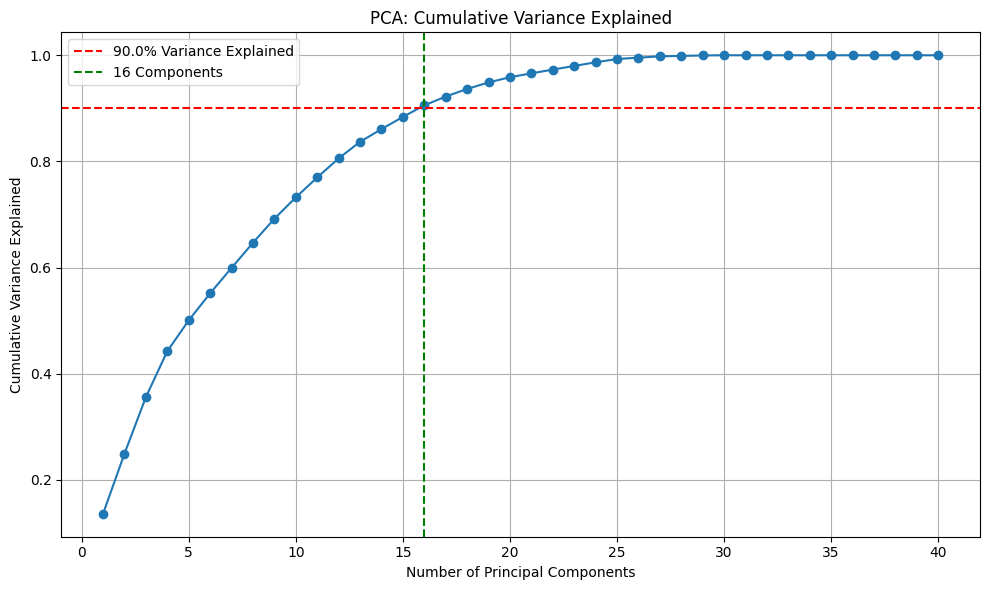


Number of Components to Explain 90.0% Variance: 16
Selected Features: ['WC', 'Clout', 'Cognition', 'Affect', 'emotion', 'emo_pos', 'emo_neg', 'we', 'tentat', 'Drives', 'insight', 'cause', 'discrep', 'certitude', 'Positive', 'Negative']

Splitting data into training and testing sets...

Tuning Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}

Random Forest Regressor Performance:
Mean Squared Error (MSE): 210568.6487
Mean Absolute Error (MAE): 132.1036
R-squared (R2): 0.1757


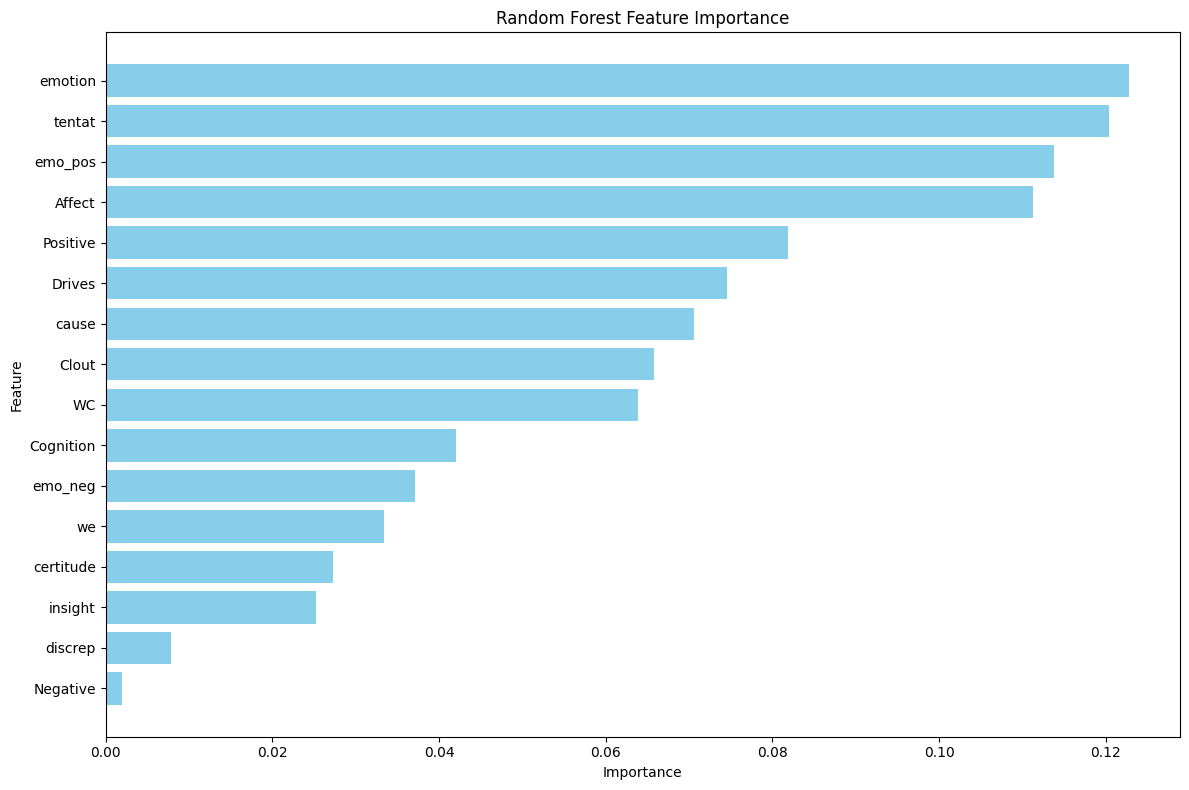

Generating 1000 bootstrap samples for error distribution...
Completed 100/1000 samples
Completed 200/1000 samples
Completed 300/1000 samples
Completed 400/1000 samples
Completed 500/1000 samples
Completed 600/1000 samples
Completed 700/1000 samples
Completed 800/1000 samples
Completed 900/1000 samples
Completed 1000/1000 samples


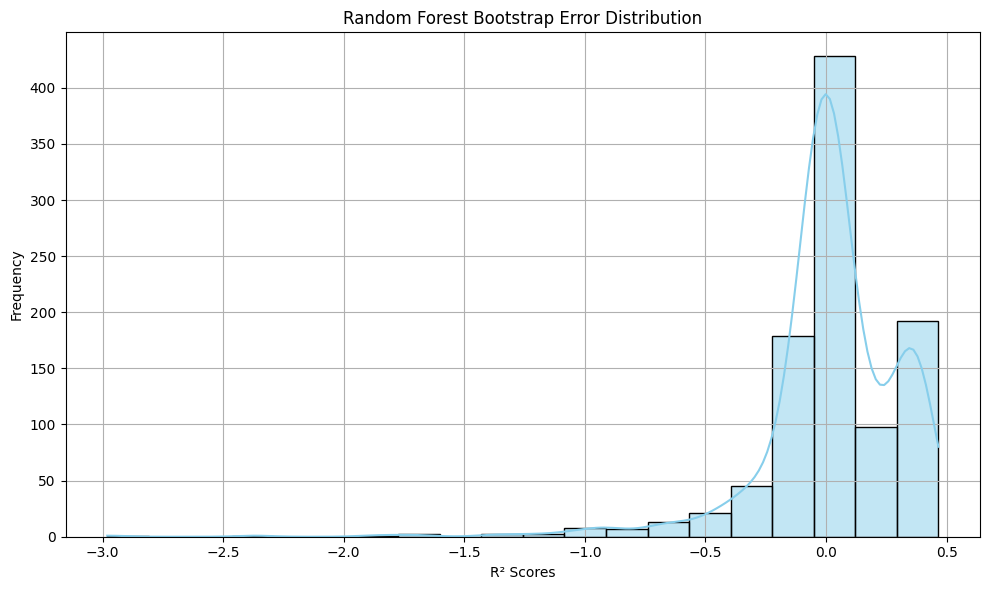


Ridge Regression Performance:
Mean Squared Error (MSE): 253512.1776
Mean Absolute Error (MAE): 135.5455
R-squared (R2): 0.0076


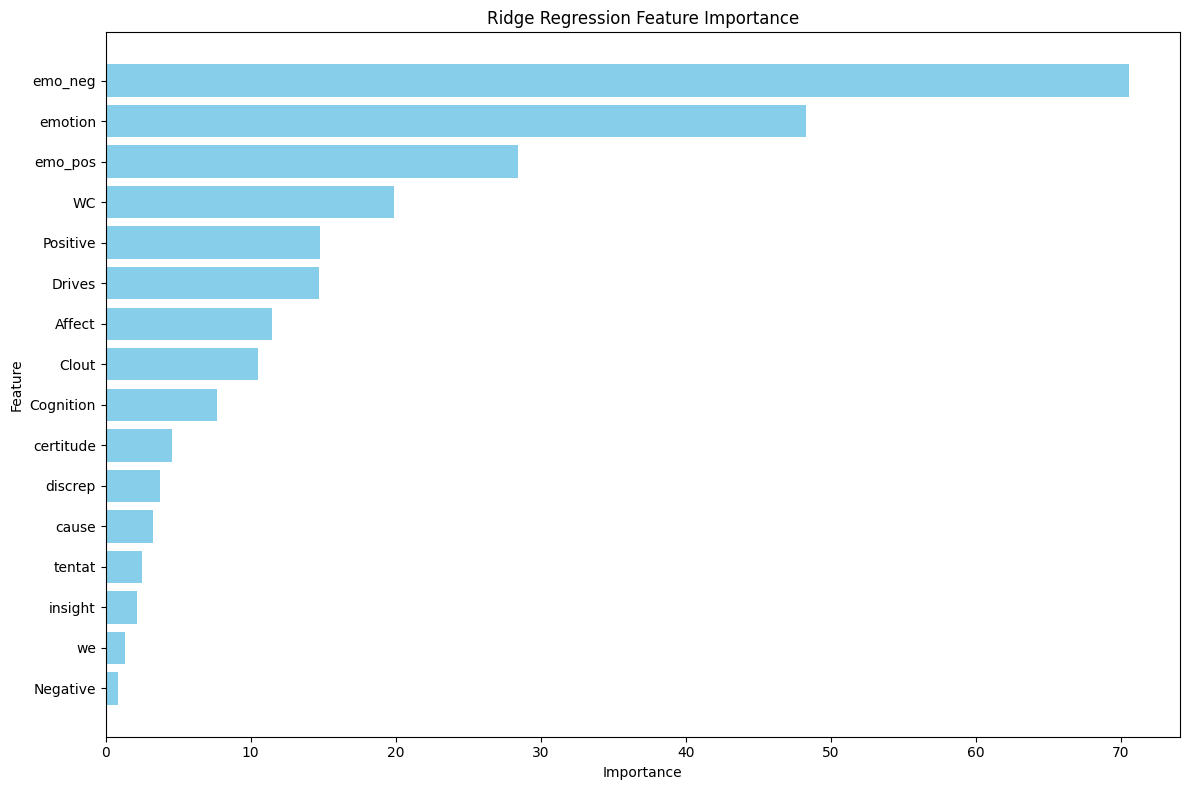

Generating 1000 bootstrap samples for error distribution...
Completed 100/1000 samples
Completed 200/1000 samples
Completed 300/1000 samples
Completed 400/1000 samples
Completed 500/1000 samples
Completed 600/1000 samples
Completed 700/1000 samples
Completed 800/1000 samples
Completed 900/1000 samples
Completed 1000/1000 samples


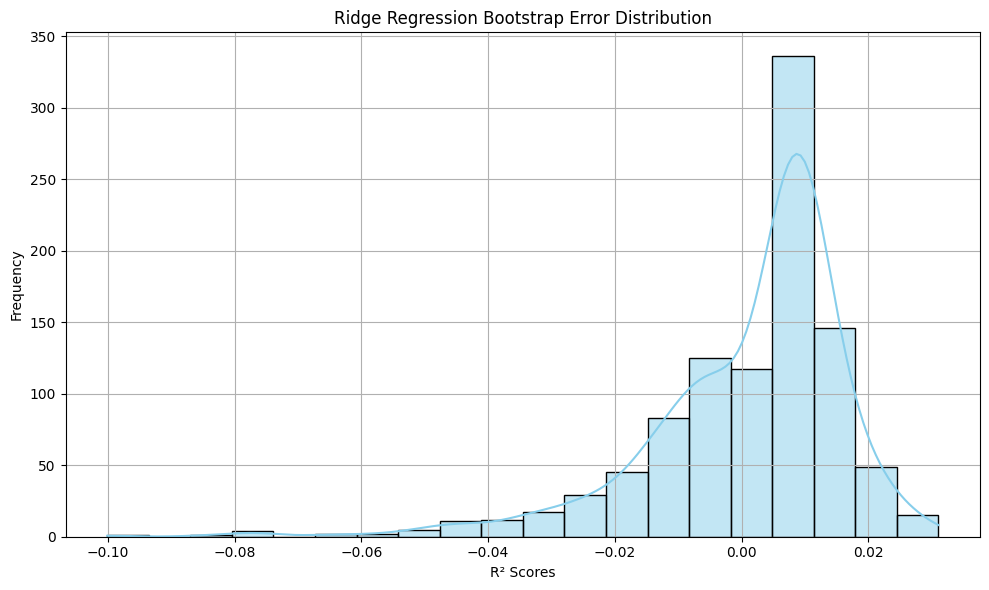


Tuning XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

XGBoost Regressor Performance:
Mean Squared Error (MSE): 215934.6666
Mean Absolute Error (MAE): 132.6120
R-squared (R2): 0.1547


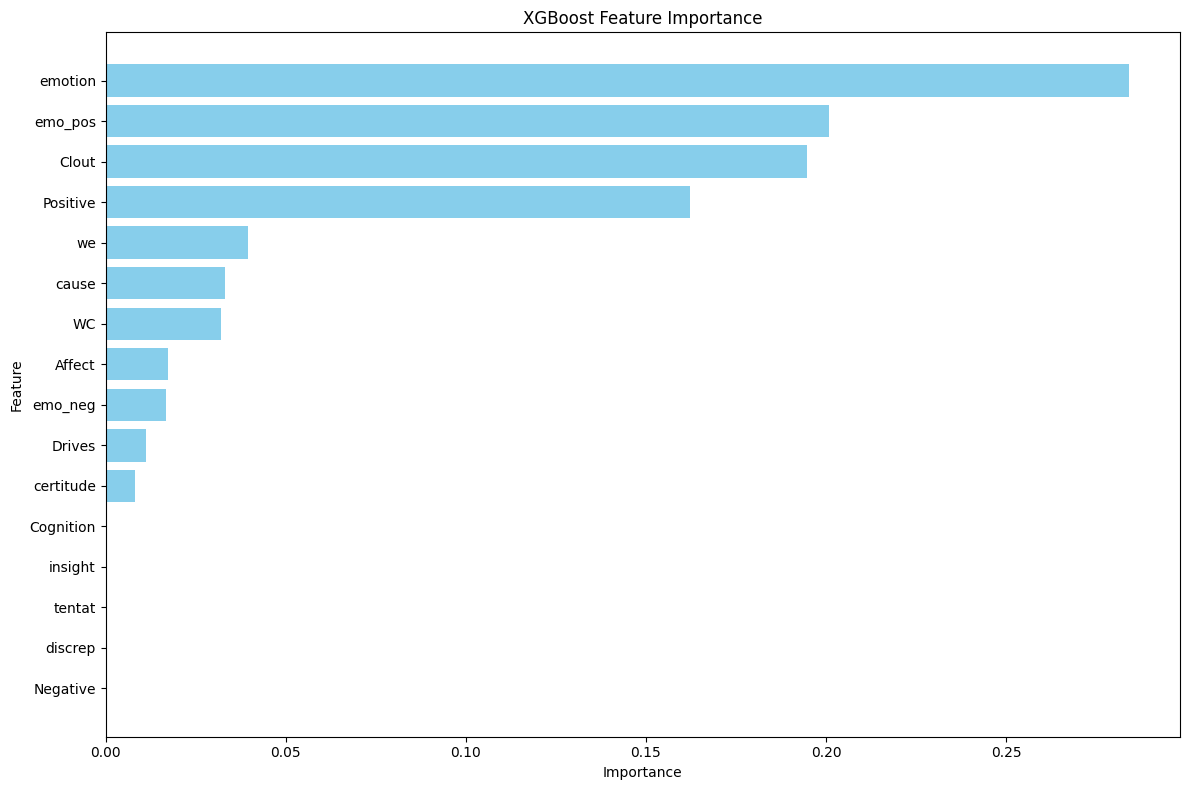

Generating 1000 bootstrap samples for error distribution...
Completed 100/1000 samples
Completed 200/1000 samples
Completed 300/1000 samples
Completed 400/1000 samples
Completed 500/1000 samples
Completed 600/1000 samples
Completed 700/1000 samples
Completed 800/1000 samples
Completed 900/1000 samples
Completed 1000/1000 samples


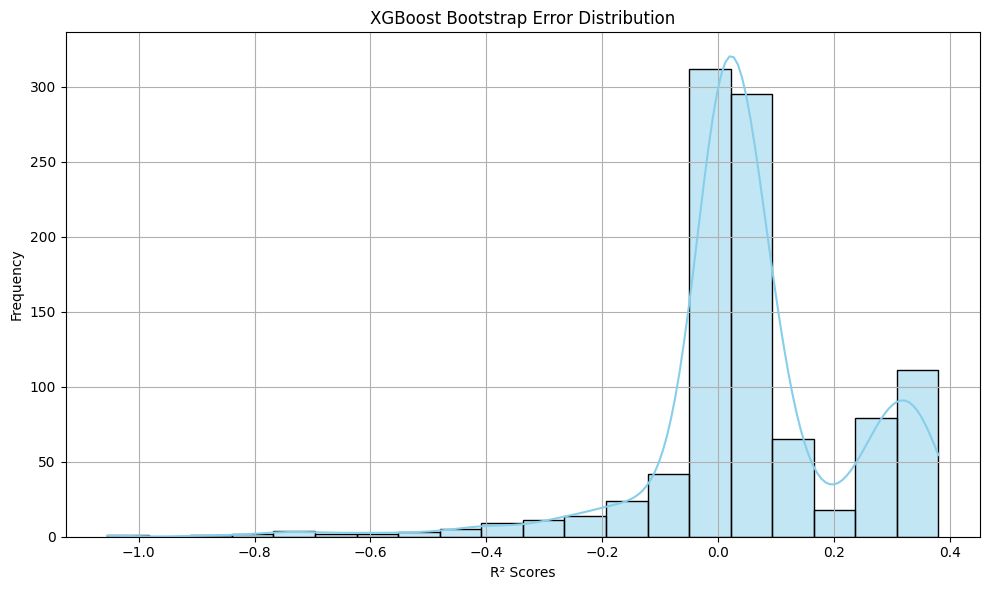

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing Function
def preprocess_data(df, features, target_column, ignore_zero_targets=False):
    if ignore_zero_targets:
        df = df[df[target_column] != 0]

    df = df[features + [target_column]].copy()

    # Handle date features
    df['Date1'] = pd.to_datetime(df['Date1'], errors='coerce')
    df['Year'] = df['Date1'].dt.year
    df['Month'] = df['Date1'].dt.month
    df['DayOfWeek'] = df['Date1'].dt.dayofweek
    df['DayOfMonth'] = df['Date1'].dt.day

    # Handle time features
    df['ParsedTime'] = pd.to_datetime(df['Time'], errors='coerce')
    df['Hour'] = df['ParsedTime'].dt.hour.fillna(0)
    df['Minute'] = df['ParsedTime'].dt.minute.fillna(0)
    df.drop(columns=['ParsedTime'], inplace=True)

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != target_column]

    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    target = df[target_column]
    df = df.drop(columns=[target_column])
    df_preprocessed = preprocessor.fit_transform(df)

    processed_columns = (
        numeric_cols +
        list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))
    )
    df_preprocessed = pd.DataFrame(df_preprocessed, columns=processed_columns)

    return df_preprocessed, target

# PCA Analysis and Feature Selection
def perform_pca_and_select_features(X, threshold=0.90):
    pca = PCA()
    X_pca = pca.fit_transform(X)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    n_components = np.argmax(cumulative_variance >= threshold) + 1
    selected_features = X.columns[:n_components]

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    plt.axhline(y=threshold, color='r', linestyle='--', label=f"{threshold*100}% Variance Explained")
    plt.axvline(x=n_components, color='g', linestyle='--', label=f"{n_components} Components")
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('PCA: Cumulative Variance Explained')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    print(f"\nNumber of Components to Explain {threshold*100}% Variance: {n_components}")
    print(f"Selected Features: {list(selected_features)}")

    return X[selected_features], selected_features

# Plot Feature Importance
def plot_feature_importance(feature_importances, title):
    plt.figure(figsize=(12, 8))
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(25)
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Bootstrap Error Distribution
def bootstrap_error_distribution_predictions(model, X, y, n_samples=1000, sample_size=0.2):
    scores = []
    n_test = int(len(X) * sample_size)

    print(f"Generating {n_samples} bootstrap samples for error distribution...")
    for i in range(n_samples):
        sampled_indices = np.random.choice(len(X), n_test, replace=True)
        X_sample = X.iloc[sampled_indices]
        y_sample = y.iloc[sampled_indices]

        y_pred = model.predict(X_sample)
        r2 = r2_score(y_sample, y_pred)
        scores.append(r2)

        if (i + 1) % 100 == 0 or i == n_samples - 1:
            print(f"Completed {i + 1}/{n_samples} samples")

    return scores

# Evaluate Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

# Parameter Tuning for Random Forest
def tune_random_forest(X_train, y_train):
    print("\nTuning Random Forest...")
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    }
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for Random Forest: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Parameter Tuning for XGBoost
def tune_xgboost(X_train, y_train):
    print("\nTuning XGBoost...")
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
    grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='r2', verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for XGBoost: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Run the Model Pipeline
def run_model_pipeline(df, to_use, target, ignore_zero_targets=True):
    print("Preprocessing data...")
    preprocessed_data, target_data = preprocess_data(df, to_use, target, ignore_zero_targets)

    print("\nPerforming PCA Analysis and Feature Selection...")
    reduced_data, selected_features = perform_pca_and_select_features(preprocessed_data)

    print("\nSplitting data into training and testing sets...")
    X_train, X_test, y_train, y_test = train_test_split(reduced_data, target_data, test_size=0.2, random_state=42)

    # Random Forest
    rf_model = tune_random_forest(X_train, y_train)
    rf_mse, rf_mae, rf_r2 = evaluate_model(rf_model, X_test, y_test)
    print("\nRandom Forest Regressor Performance:")
    print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
    print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
    print(f"R-squared (R2): {rf_r2:.4f}")

    rf_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': rf_model.feature_importances_})
    plot_feature_importance(rf_feature_importances, "Random Forest Feature Importance")

    rf_bootstrap_scores = bootstrap_error_distribution_predictions(rf_model, X_test, y_test)
    plt.figure(figsize=(10, 6))
    sns.histplot(rf_bootstrap_scores, kde=True, bins=20, color='skyblue')
    plt.xlabel("R² Scores")
    plt.ylabel("Frequency")
    plt.title("Random Forest Bootstrap Error Distribution")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Ridge Regression
    ridge_model = Ridge(alpha=1.0, random_state=42)
    ridge_model.fit(X_train, y_train)
    ridge_mse, ridge_mae, ridge_r2 = evaluate_model(ridge_model, X_test, y_test)
    print("\nRidge Regression Performance:")
    print(f"Mean Squared Error (MSE): {ridge_mse:.4f}")
    print(f"Mean Absolute Error (MAE): {ridge_mae:.4f}")
    print(f"R-squared (R2): {ridge_r2:.4f}")

    ridge_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': np.abs(ridge_model.coef_)})
    plot_feature_importance(ridge_feature_importances, "Ridge Regression Feature Importance")

    ridge_bootstrap_scores = bootstrap_error_distribution_predictions(ridge_model, X_test, y_test)
    plt.figure(figsize=(10, 6))
    sns.histplot(ridge_bootstrap_scores, kde=True, bins=20, color='skyblue')
    plt.xlabel("R² Scores")
    plt.ylabel("Frequency")
    plt.title("Ridge Regression Bootstrap Error Distribution")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # XGBoost
    xgb_model = tune_xgboost(X_train, y_train)
    xgb_mse, xgb_mae, xgb_r2 = evaluate_model(xgb_model, X_test, y_test)
    print("\nXGBoost Regressor Performance:")
    print(f"Mean Squared Error (MSE): {xgb_mse:.4f}")
    print(f"Mean Absolute Error (MAE): {xgb_mae:.4f}")
    print(f"R-squared (R2): {xgb_r2:.4f}")

    xgb_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': xgb_model.feature_importances_})
    plot_feature_importance(xgb_feature_importances, "XGBoost Feature Importance")

    xgb_bootstrap_scores = bootstrap_error_distribution_predictions(xgb_model, X_test, y_test)
    plt.figure(figsize=(10, 6))
    sns.histplot(xgb_bootstrap_scores, kde=True, bins=20, color='skyblue')
    plt.xlabel("R² Scores")
    plt.ylabel("Frequency")
    plt.title("XGBoost Bootstrap Error Distribution")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example Usage
to_use = ['Date1', 'OpnHours', 'DateDay', 'Day', 'Time', 'Vividness', 'ContentType', 
          'WC', 'Clout', 'Cognition', 'Affect', 'emotion', 'emo_pos', 'emo_neg', 'we', 
          'tentat', 'Drives', 'insight', 'cause', 'discrep', 'certitude', 'Positive', 
          'Negative', 'Total_Sentiment', 'cluster']
target = 'like_count'

# Run the pipeline
run_model_pipeline(data, to_use, target)


Preprocessing data...

Performing PCA Analysis and Feature Selection...


/tmp/ipykernel_381737/2209751026.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ParsedTime'] = pd.to_datetime(df['Time'], errors='coerce')


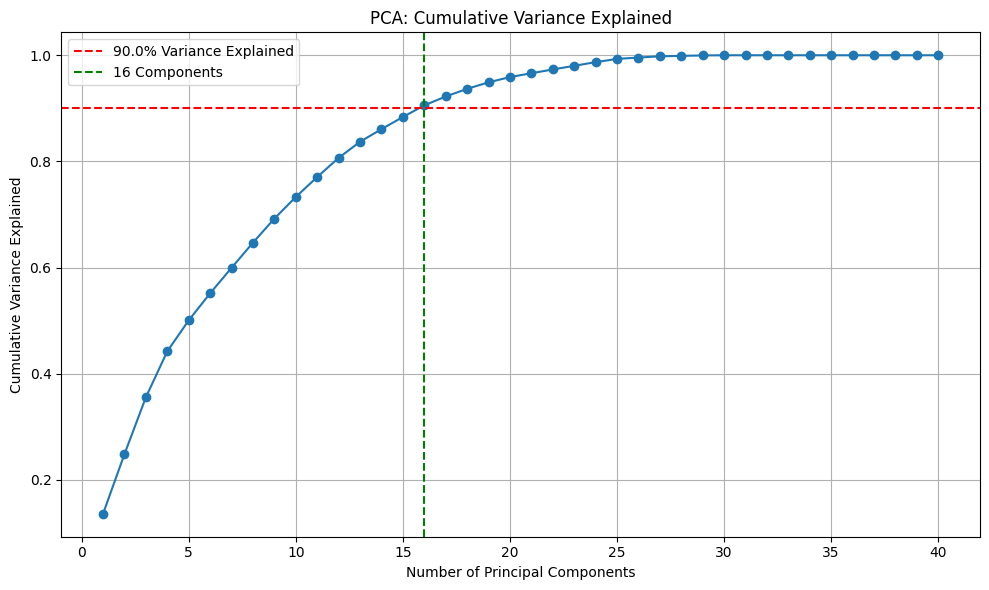


Number of Components to Explain 90.0% Variance: 16
Selected Features: ['WC', 'Clout', 'Cognition', 'Affect', 'emotion', 'emo_pos', 'emo_neg', 'we', 'tentat', 'Drives', 'insight', 'cause', 'discrep', 'certitude', 'Positive', 'Negative']

Splitting data into training and testing sets...

Tuning Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}

Random Forest Regressor Performance:
Mean Squared Error (MSE): 3968.2523
Mean Absolute Error (MAE): 17.3473
R-squared (R2): 0.0069


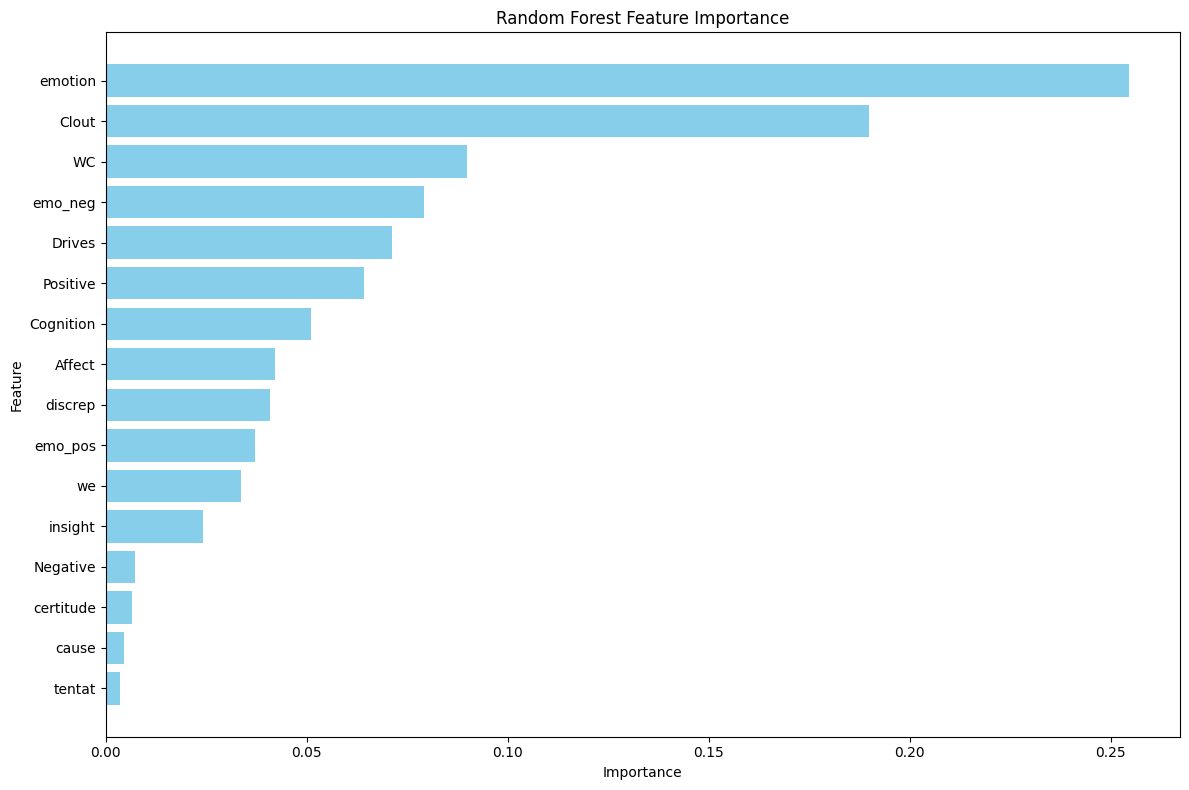

Generating 1000 bootstrap samples for error distribution...
Completed 100/1000 samples
Completed 200/1000 samples
Completed 300/1000 samples
Completed 400/1000 samples
Completed 500/1000 samples
Completed 600/1000 samples
Completed 700/1000 samples
Completed 800/1000 samples
Completed 900/1000 samples
Completed 1000/1000 samples


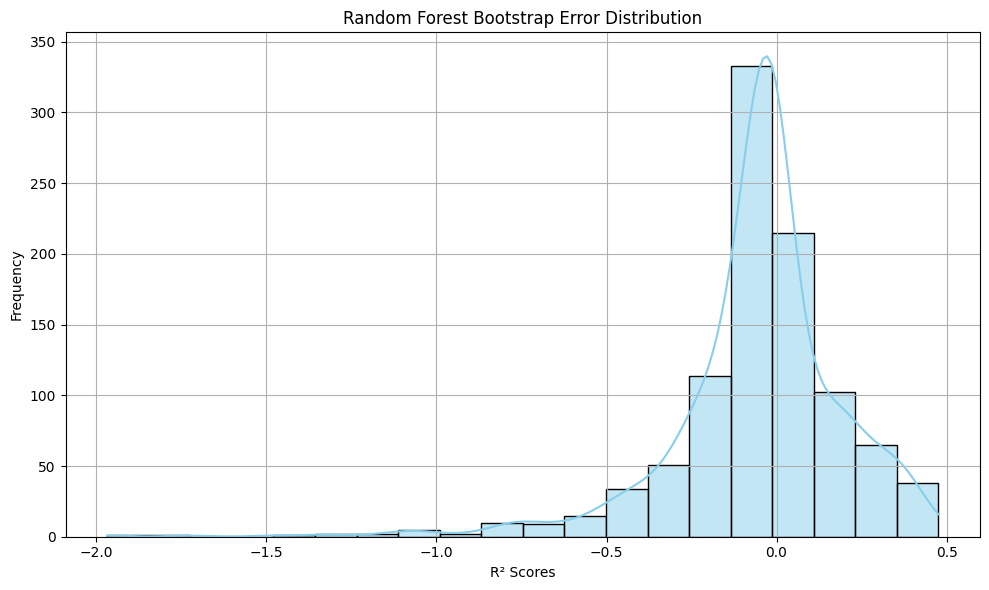


Ridge Regression Performance:
Mean Squared Error (MSE): 3979.5741
Mean Absolute Error (MAE): 17.3068
R-squared (R2): 0.0041


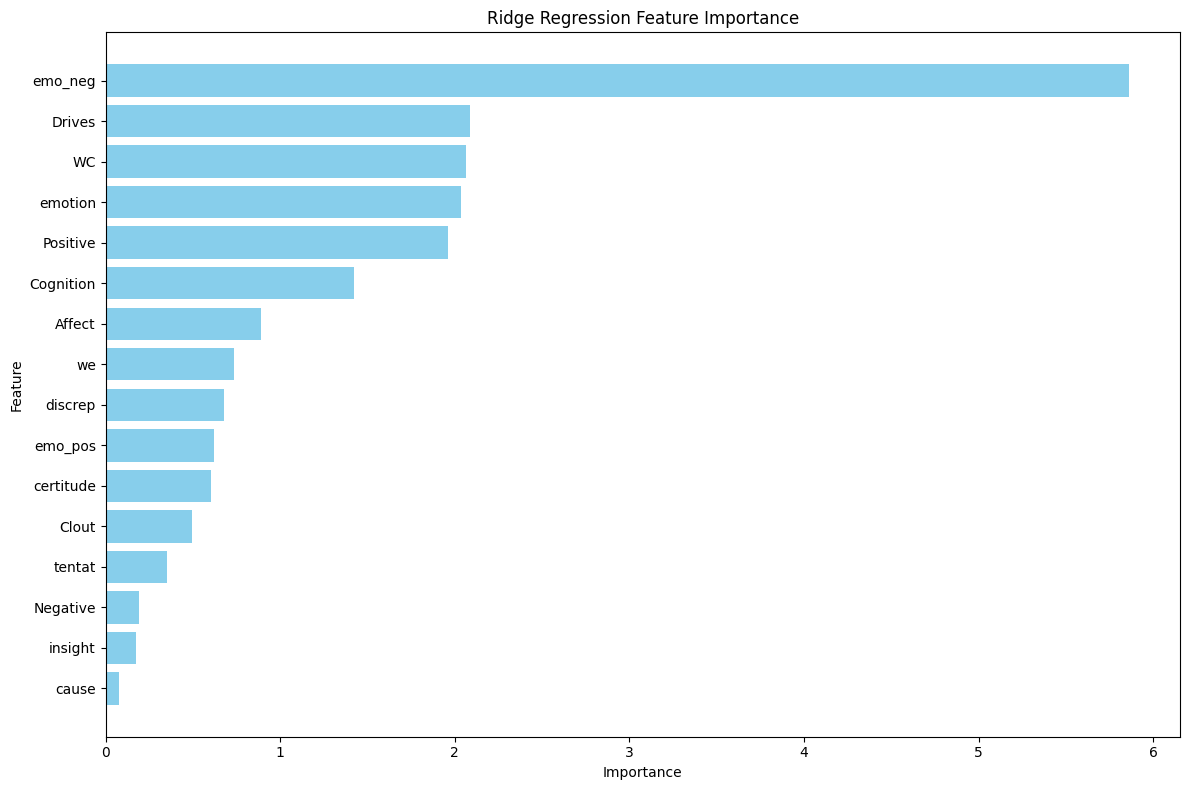

Generating 1000 bootstrap samples for error distribution...
Completed 100/1000 samples
Completed 200/1000 samples
Completed 300/1000 samples
Completed 400/1000 samples
Completed 500/1000 samples
Completed 600/1000 samples
Completed 700/1000 samples
Completed 800/1000 samples
Completed 900/1000 samples
Completed 1000/1000 samples


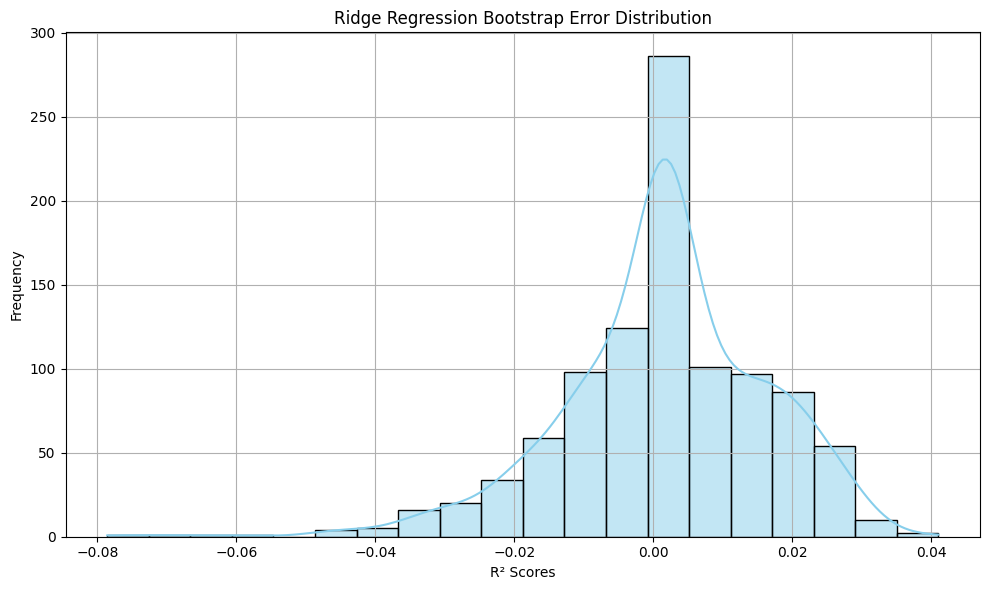


Tuning XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

XGBoost Regressor Performance:
Mean Squared Error (MSE): 3939.8225
Mean Absolute Error (MAE): 17.2202
R-squared (R2): 0.0140


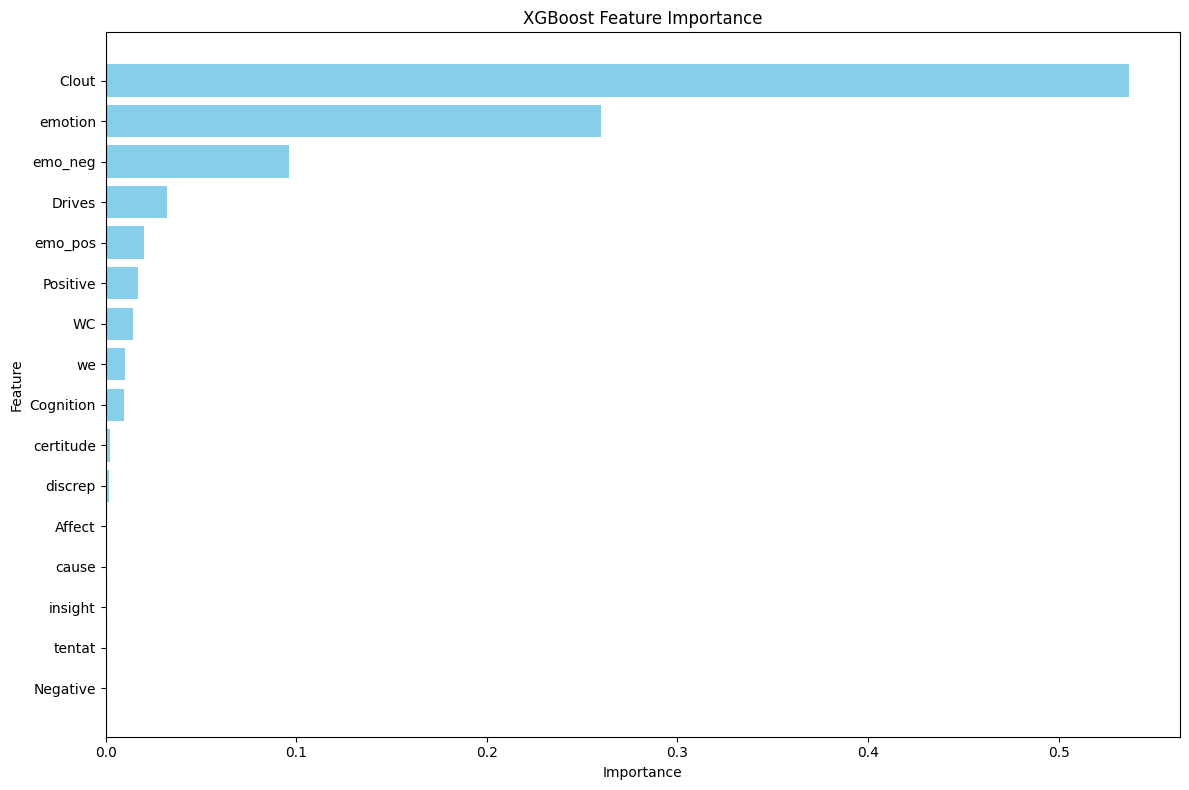

Generating 1000 bootstrap samples for error distribution...
Completed 100/1000 samples
Completed 200/1000 samples
Completed 300/1000 samples
Completed 400/1000 samples
Completed 500/1000 samples
Completed 600/1000 samples
Completed 700/1000 samples
Completed 800/1000 samples
Completed 900/1000 samples
Completed 1000/1000 samples


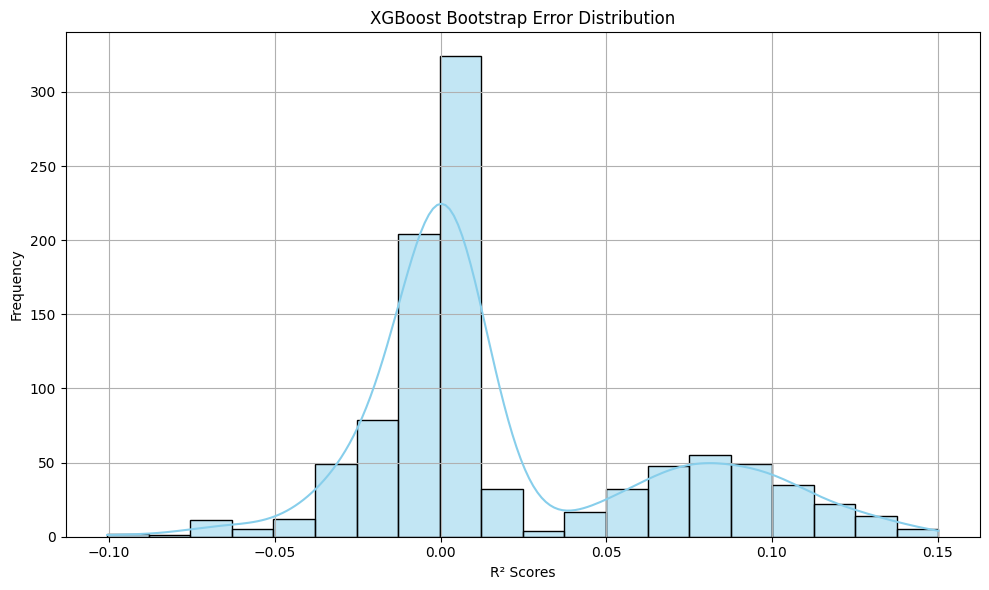

In [33]:
target = 'retweet_count'

# Run the pipeline
run_model_pipeline(data, to_use, target)

/tmp/ipykernel_381737/3633520528.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ParsedTime'] = pd.to_datetime(df['Time'], errors='coerce')



Random Forest Regressor Performance:
Mean Squared Error (MSE): 115.8827
Mean Absolute Error (MAE): 4.2655
R-squared (R2): 0.0383

Top Features by Importance (Random Forest):
                       Feature  Importance
4                      emotion    0.309587
0                           WC    0.081300
17                     cluster    0.074502
2                    Cognition    0.043938
32     Time_Non-buisness hours    0.042550
31         Time_Business hours    0.041534
21      OpnHours_Working Hours    0.040088
20  OpnHours_Non-working Hours    0.038998
6                      emo_neg    0.037855
1                        Clout    0.036397


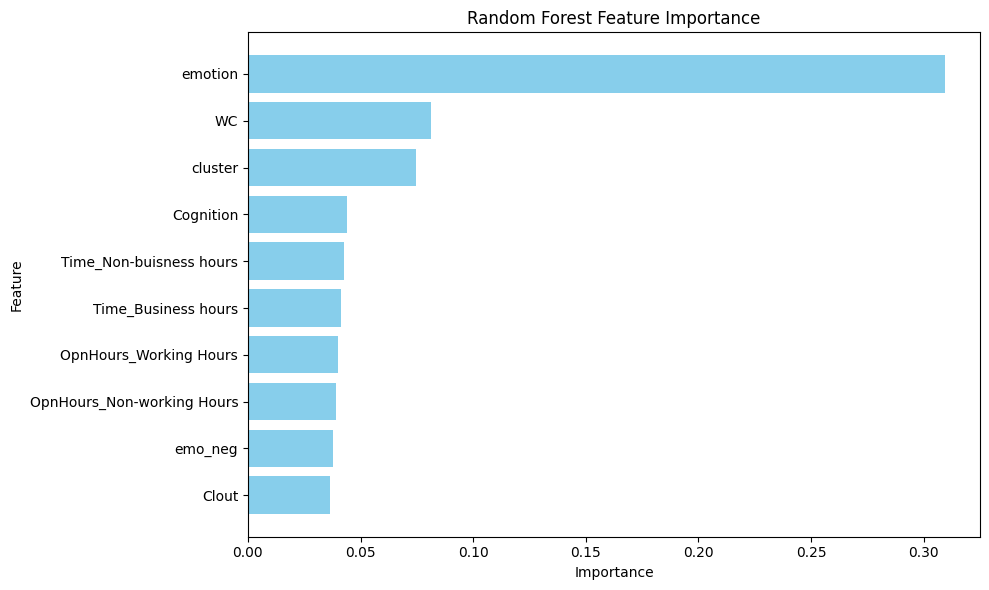


Ridge Regression Performance:
Mean Squared Error (MSE): 119.4685
Mean Absolute Error (MAE): 4.6667
R-squared (R2): 0.0086

Top Features by Coefficients (Ridge Regression):
                    Feature  Coefficient
36           Vividness_text     5.800939
28        DateDay_Wednesday     2.391513
39  ContentType_Interaction     1.661930
8                    tentat     1.454417
10                  insight     1.108419
14                 Positive     0.908453
12                  discrep     0.727282
16          Total_Sentiment     0.605679
37          Vividness_video     0.588676
3                    Affect     0.569381


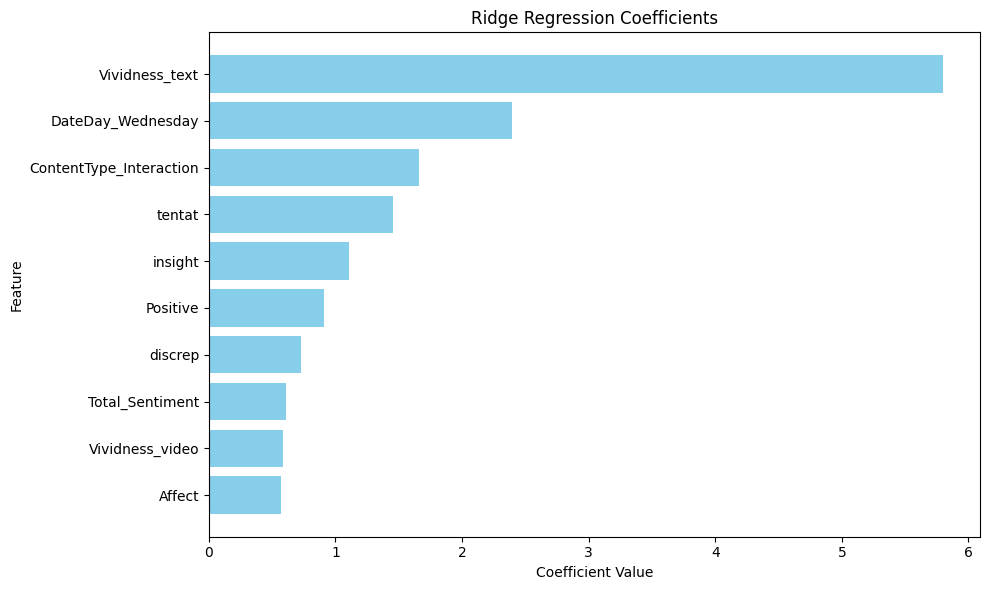


XGBoost Regressor Performance:
Mean Squared Error (MSE): 103.6772
Mean Absolute Error (MAE): 4.0821
R-squared (R2): 0.1396

Top Features by Importance (XGBoost):
            Feature  Importance
4           emotion    0.482074
0                WC    0.242748
6           emo_neg    0.047731
25   DateDay_Sunday    0.036550
36   Vividness_text    0.030514
14         Positive    0.021150
1             Clout    0.015825
12          discrep    0.013062
37  Vividness_video    0.011945
8            tentat    0.009765


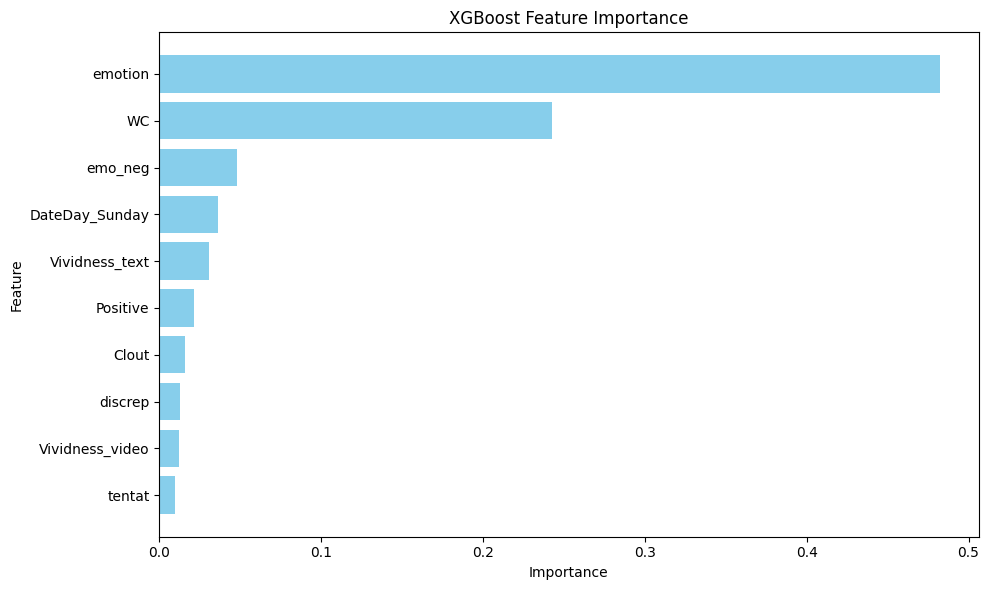

In [ ]:
target = 'reply_count'

# Run the pipeline
run_model_pipeline(data, to_use, target)

/tmp/ipykernel_381737/3633520528.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ParsedTime'] = pd.to_datetime(df['Time'], errors='coerce')



Random Forest Regressor Performance:
Mean Squared Error (MSE): 1103.3048
Mean Absolute Error (MAE): 3.2553
R-squared (R2): -15.9073

Top Features by Importance (Random Forest):
                       Feature  Importance
4                      emotion    0.392123
1                        Clout    0.105096
3                       Affect    0.072074
0                           WC    0.071365
17                     cluster    0.045308
2                    Cognition    0.044052
6                      emo_neg    0.040282
21      OpnHours_Working Hours    0.027091
20  OpnHours_Non-working Hours    0.024754
9                       Drives    0.021103


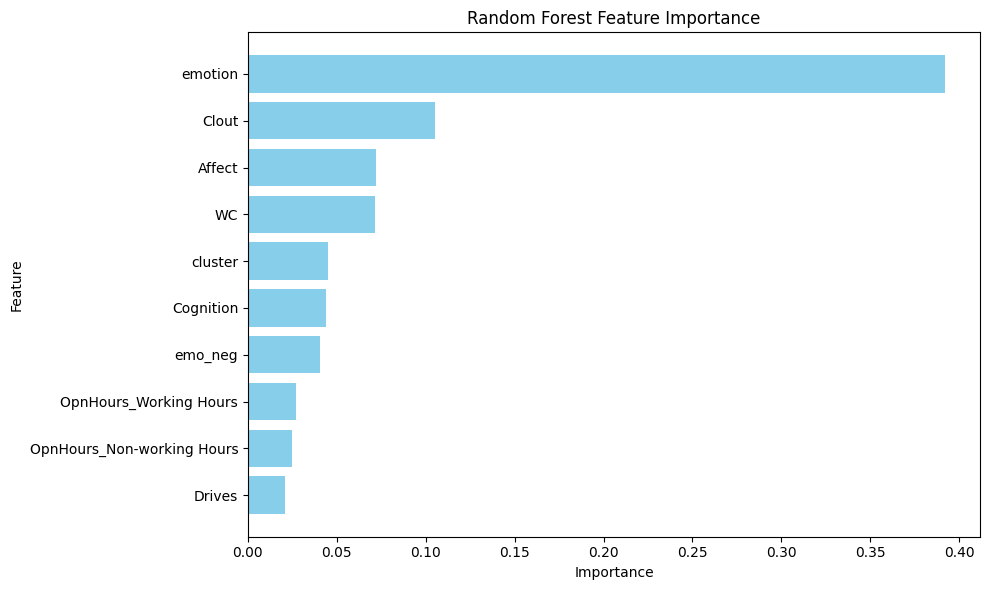


Ridge Regression Performance:
Mean Squared Error (MSE): 66.5888
Mean Absolute Error (MAE): 2.4088
R-squared (R2): -0.0204

Top Features by Coefficients (Ridge Regression):
                       Feature  Coefficient
28           DateDay_Wednesday     1.449799
36              Vividness_text     0.841180
37             Vividness_video     0.769118
31         Time_Business hours     0.665951
14                    Positive     0.587249
3                       Affect     0.487880
16             Total_Sentiment     0.417837
20  OpnHours_Non-working Hours     0.355853
7                           we     0.257443
15                    Negative     0.245675


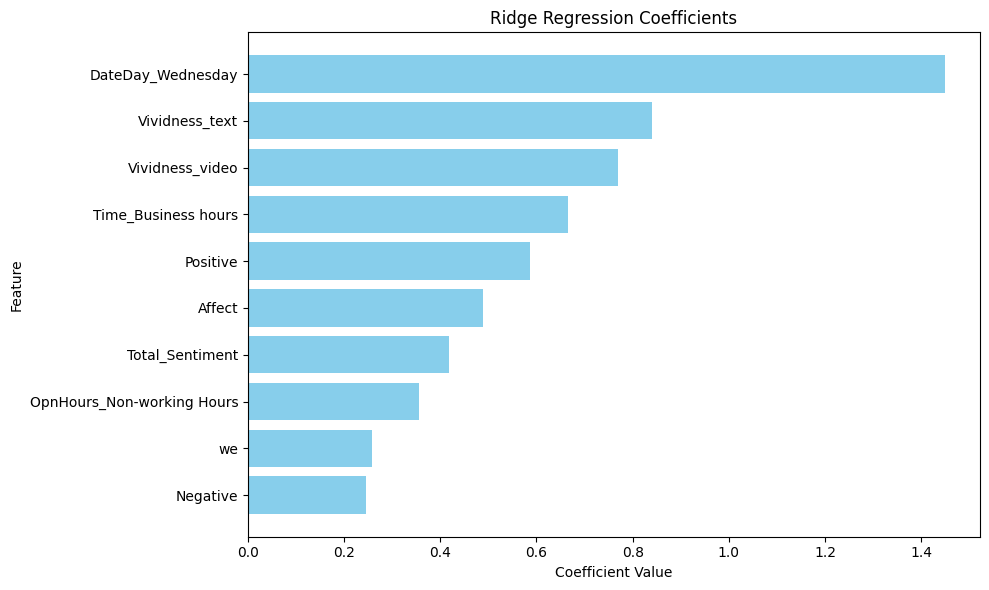


XGBoost Regressor Performance:
Mean Squared Error (MSE): 116.3122
Mean Absolute Error (MAE): 2.5737
R-squared (R2): -0.7824

Top Features by Importance (XGBoost):
                    Feature  Importance
4                   emotion    0.644557
0                        WC    0.146579
6                   emo_neg    0.046430
22           DateDay_Friday    0.042767
38  ContentType_Information    0.019591
14                 Positive    0.015726
1                     Clout    0.012963
25           DateDay_Sunday    0.008973
35          Vividness_photo    0.005961
3                    Affect    0.005188


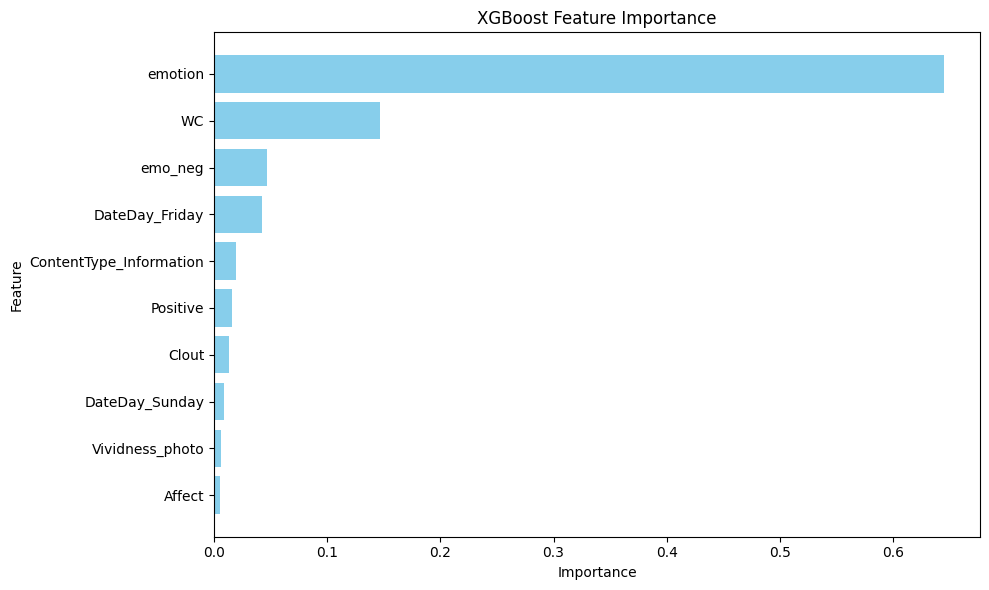

In [ ]:
target = 'quote_count'

# Run the pipeline
run_model_pipeline(data, to_use, target)